# Training a VAE on Bernoulli dataset


In [1]:
import dynalearn as dl
import matplotlib.pyplot as plt
import numpy as np
import torch

## Training paramters

In [4]:
n_input = 100
n_hidden = [64, 32]
n_embedding = 8
numsample=50000
keepprob=1.

## Generating the Bernoulli dataset

In [5]:
train_dataset = dl.Bernoulli_Dataset(dim=n_input, numsample=numsample,p=None)
val_dataset = dl.Bernoulli_Dataset(dim=n_input, numsample=1000,p=train_dataset.p)

## Defining the generative model (VAE)

In [13]:
optimizer = lambda p: torch.optim.Adam(p, lr=1e-3)
#optimizer = lambda p: torch.optim.SGD(p, lr=1e-3)
fcvae = dl.FC_VAE(n_input, n_hidden, n_embedding, keepprob, optimizer=optimizer, use_cuda=True)
fcvae.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

## Training

In [14]:
fcvae.fit(train_dataset=train_dataset, val_dataset=val_dataset, epochs=100, batch_size=64)

Epoch 0 - Train loss: 49.0528 - Val loss: 48.8272 - Training time: 7.0638 - New best config.
Epoch 1 - Train loss: 48.6164 - Val loss: 48.3912 - Training time: 7.2843 - New best config.
Epoch 2 - Train loss: 48.1688 - Val loss: 47.9806 - Training time: 7.3286 - New best config.
Epoch 3 - Train loss: 47.7211 - Val loss: 47.4931 - Training time: 7.3849 - New best config.
Epoch 4 - Train loss: 47.3904 - Val loss: 47.1455 - Training time: 7.3294 - New best config.
Epoch 5 - Train loss: 47.2936 - Val loss: 47.0706 - Training time: 7.3500 - New best config.
Epoch 6 - Train loss: 47.2418 - Val loss: 47.0364 - Training time: 7.3329 - New best config.
Epoch 7 - Train loss: 47.1892 - Val loss: 47.0017 - Training time: 7.2391 - New best config.
Epoch 8 - Train loss: 47.1138 - Val loss: 46.9632 - Training time: 7.2104 - New best config.
Epoch 9 - Train loss: 46.9168 - Val loss: 46.7539 - Training time: 7.2415 - New best config.
Epoch 10 - Train loss: 46.6598 - Val loss: 46.4594 - Training time: 7.

Epoch 96 - Train loss: 45.0616 - Val loss: 44.8439 - Training time: 7.3766
Epoch 97 - Train loss: 45.0636 - Val loss: 44.8899 - Training time: 7.4629
Epoch 98 - Train loss: 45.0455 - Val loss: 44.8180 - Training time: 7.3374 - New best config.
Epoch 99 - Train loss: 45.0190 - Val loss: 44.7959 - Training time: 7.3574 - New best config.


## Testing and checking the results

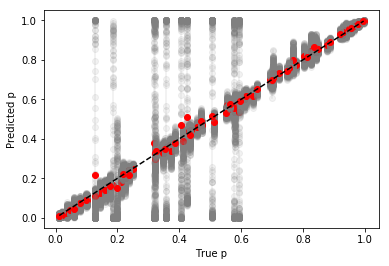

In [15]:
sample, z = fcvae.predict(256)
def display_result(p_pred, p_true):
    fig, ax = plt.subplots(1, 1)
    
    for i, p in enumerate(p_true):
        n, m = p_pred.shape
        ax.plot(np.ones(n) * p, p_pred[:, i], c='gray', marker='o', alpha=0.1)
        ax.plot(p, np.mean(p_pred[:, i]), 'ro', alpha=1)
    
    ax.plot([min(p_true), max(p_true)], [min(p_true), max(p_true)], 'k--')
    ax.set_xlabel('True p')
    ax.set_ylabel('Predicted p')
    fig.savefig('fig/png/bernoulli_parameters.png')
    fig.savefig('fig/pdf/bernoulli_parameters.pdf')
    plt.show()

display_result(sample, train_dataset.p)
